<a href="https://colab.research.google.com/github/bertopadron/bertopadron.github.io/blob/master/In_progress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FTIR-EBSD project

![image.png](attachment:image.png)

FIGURE 1. The coordinate system in which the orientation of the polarization vector E of FTIR measurement is expressed, relative to the a, b, and c axes of an orthorhombic crystal. Vector E' is the projection of E onto the (a-b) plane. Angle $\theta$ is the azimuth of E' in the (a-b) plane, measured from the a-axis, and $\phi$ is the angle between E and the c-axis. By convention, both θ and φ are reported in the domain 0 to 90°, as the optical properties are symmetrical with respect to reflection about the (a-b), (b-c), and (a-c) planes.

In [9]:
import numpy as np
import sympy as sp
from sympy.interactive import printing 
printing.init_printing(use_latex = True)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [10]:
Ta = 100 # x // [100]
Tb = 50 # y // [010]
Tc = 10 # z // [001]

In [11]:
euler_input = [0, 90, 90]  # in degrees. Range (0, 360) (0, 180) (0, 360)

# Genereting the absorbance figure
## POLAR COORDINATES
generate a matrix containing lineary distributed values of azimuth and elevation elevation for the function sph2car

azimuth (phi) is the counterclockwise angle in the x-y plane measured in radians from the positive x-axis.

elevation (theta) is the angle in radians from the vertical z-direction.



## Transmition along any direction given in polar coordinates

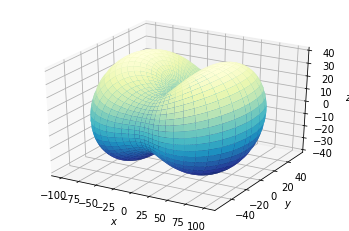

In [14]:
n = 100

# phi is measured from the z (vertical) direction
theta, phi = np.meshgrid(np.linspace(0, 2*np.pi, n),np.linspace(0, np.pi, n));

# T is the magnitud of the vector (rho) in polar coordinates
T = Ta*np.cos(theta)**2*np.sin(phi)**2 + Tb*np.sin(theta)**2*np.sin(phi)**2 + Tc*np.cos(phi)**2;

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Express the mesh in the cartesian system.

rsin_phi = T * np.sin(phi)
x = rsin_phi * np.cos(theta)
y = rsin_phi * np.sin(theta)
z = T * np.cos(phi)

# Plot the surface.
ax.plot_surface(x, y, z, cmap=plt.cm.YlGnBu_r)

# Tweak the limits andnp.pi/2-theta add latex math labels.
#ax.set_zlim(0, 1)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$z$')

plt.show()

In [17]:
# SECTION defined by Euler angle

E1 = np.pi/4 #  deg2rad(euler_input(1)); # E1 : first euler angle (phi_1) range [0 2*pi] 
E2 = 0       # deg2rad(euler_input(2)); # E2 : first euler angle (Phi)   range [0   pi]
E3 = 0      # deg2rad(euler_input(3)); # E3 : first euler angle (phi_2) range [] 2*pi]
# Rotation matrix in Bunge convection z-direction, u (ex x-direction), z1-direction
# see Depriester, Dorian. (2018). Computing Euler angles with Bunge convention from rotation matrix. 10.13140/RG.2.2.34498.48321/2. 

R11 = np.cos(E1)*np.cos(E3)-np.sin(E1)*np.sin(E3)*np.cos(E2)
R12 = np.sin(E1)*np.cos(E3)+np.cos(E1)*np.sin(E3)*np.cos(E2)
R13 = np.sin(E3)*np.sin(E2)

R21 = -np.cos(E1)*np.sin(E3)-np.sin(E1)*np.cos(E3)*np.cos(E2)
R22 = -np.sin(E1)*np.sin(E3)+np.cos(E1)*np.cos(E3)*np.cos(E2)
R23 = np.cos(E3)*np.sin(E2)

R31 = np.sin(E1)*np.sin(E2)
R32 = -np.cos(E1)*np.sin(E2)
R33 = np.cos(E2)

R = np.array([[R11, R12, R13], 
             [R21, R22, R23], 
             [R31, R32, R33]]) 


In [26]:
points = np.array([[1, 2, 3],
                   [3, 5, 6])

x_r = (R @ points.T).T

In [32]:
x[:,1].T

array([0.00000000e+00, 3.19502887e-01, 6.55826407e-01, 1.02561901e+00,
       1.44518636e+00, 1.93032390e+00, 2.49615404e+00, 3.15696957e+00,
       3.92608468e+00, 4.81569495e+00, 5.83674761e+00, 6.99882325e+00,
       8.31003012e+00, 9.77691193e+00, 1.14043700e+01, 1.31956008e+01,
       1.51520484e+01, 1.72733743e+01, 1.95574424e+01, 2.20003217e+01,
       2.45963043e+01, 2.73379413e+01, 3.02160938e+01, 3.32199997e+01,
       3.63373559e+01, 3.95544149e+01, 4.28560944e+01, 4.62260997e+01,
       4.96470582e+01, 5.31006625e+01, 5.65678243e+01, 6.00288346e+01,
       6.34635304e+01, 6.68514661e+01, 7.01720880e+01, 7.34049103e+01,
       7.65296906e+01, 7.95266045e+01, 8.23764166e+01, 8.50606462e+01,
       8.75617283e+01, 8.98631646e+01, 9.19496680e+01, 9.38072945e+01,
       9.54235650e+01, 9.67875735e+01, 9.78900827e+01, 9.87236040e+01,
       9.92824632e+01, 9.95628497e+01, 9.95628497e+01, 9.92824632e+01,
       9.87236040e+01, 9.78900827e+01, 9.67875735e+01, 9.54235650e+01,
      

In [ ]:
theta

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [1.57079633, 1.57079633, 1.57079633, 1.57079633, 1.57079633],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [4.71238898, 4.71238898, 4.71238898, 4.71238898, 4.71238898],
       [6.28318531, 6.28318531, 6.28318531, 6.28318531, 6.28318531]])